In [1]:
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import scipy.stats as st

In [2]:
data_df = pd.read_csv("final_auto_stock_data.csv")
data_df['Industry'].unique()

array(['Auto & Truck Dealerships', 'Auto Parts', 'Auto Manufacturers',
       'Semiconductors'], dtype=object)

In [3]:
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,CPRT,Automobiles,Auto & Truck Dealerships,43.52,43.6700,43.190,43.60,860740.0
1,2018-01-03,CPRT,Automobiles,Auto & Truck Dealerships,43.63,43.8500,43.200,43.39,1152481.0
2,2018-01-04,CPRT,Automobiles,Auto & Truck Dealerships,43.50,43.9500,43.300,43.74,1164240.0
3,2018-01-05,CPRT,Automobiles,Auto & Truck Dealerships,43.77,43.8800,43.030,43.53,922916.0
4,2018-01-08,CPRT,Automobiles,Auto & Truck Dealerships,43.59,43.8600,43.280,43.55,1254075.0
...,...,...,...,...,...,...,...,...,...
28602,2023-11-28,INTC,Automobiles,Semiconductors,43.69,44.3827,43.660,44.23,24548874.0
28603,2023-11-29,INTC,Automobiles,Semiconductors,44.60,45.3400,44.600,44.94,38982026.0
28604,2023-11-30,INTC,Automobiles,Semiconductors,44.65,45.0900,44.410,44.70,46262971.0
28605,2023-12-01,INTC,Automobiles,Semiconductors,44.36,44.3600,42.860,43.74,43928371.0


In [4]:
df1 = data_df.loc[data_df['Industry']=="Auto & Truck Dealerships",:]
df2 = data_df.loc[data_df['Industry']=="Auto Parts",:]
df3 = data_df.loc[data_df['Industry']=="Auto Manufacturers",:]
df4 = data_df.loc[data_df['Industry']=="Semiconductors",:]

In [5]:
df1

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,CPRT,Automobiles,Auto & Truck Dealerships,43.52,43.670,43.1900,43.60,860740.0
1,2018-01-03,CPRT,Automobiles,Auto & Truck Dealerships,43.63,43.850,43.2000,43.39,1152481.0
2,2018-01-04,CPRT,Automobiles,Auto & Truck Dealerships,43.50,43.950,43.3000,43.74,1164240.0
3,2018-01-05,CPRT,Automobiles,Auto & Truck Dealerships,43.77,43.880,43.0300,43.53,922916.0
4,2018-01-08,CPRT,Automobiles,Auto & Truck Dealerships,43.59,43.860,43.2800,43.55,1254075.0
...,...,...,...,...,...,...,...,...,...
7450,2023-11-28,AN,Automobiles,Auto & Truck Dealerships,131.34,134.460,130.3500,132.58,479984.0
7451,2023-11-29,AN,Automobiles,Auto & Truck Dealerships,134.55,137.000,133.9748,134.13,743123.0
7452,2023-11-30,AN,Automobiles,Auto & Truck Dealerships,134.82,135.675,133.2300,135.27,492893.0
7453,2023-12-01,AN,Automobiles,Auto & Truck Dealerships,135.29,140.220,135.0350,140.13,404547.0


In [6]:
group_df1 = df1.groupby("Date")['Close'].mean().reset_index()
group_df2 = df2.groupby("Date")['Close'].mean().reset_index()
group_df3 = df3.groupby("Date")['Close'].mean().reset_index()
group_df4 = df4.groupby("Date")['Close'].mean().reset_index()

In [7]:
merged_df = pd.merge(group_df1, group_df2, on='Date', how='inner', suffixes=('_df1', '_df2'))
merged_df = pd.merge(merged_df, group_df3, on='Date', how='inner', suffixes=('_merged', '_df3'))
merged_df = pd.merge(merged_df, group_df4, on='Date', how='inner', suffixes=('_df3', '_df4'))

In [8]:
merged_df = merged_df.rename(columns={"Close_df1": "Auto & Truck Dealerships",
                                      "Close_df2": "Auto Parts",
                                      "Close_df3": "Auto Manufacturers",
                                      "Close_df4": "Semiconductors"})
merged_df

,Date,Auto & Truck Dealerships,Auto Parts,Auto Manufacturers,Semiconductors
0,2018-01-02,64.740,78.1200,107.568,113.042
1,2018-01-03,65.802,78.8125,107.550,116.184
2,2018-01-04,66.374,79.9600,107.872,116.330
3,2018-01-05,67.748,81.6375,108.654,117.220
4,2018-01-08,68.818,81.3650,112.870,118.746
...,...,...,...,...,...
1486,2023-11-28,133.242,64.6580,100.814,337.756
1487,2023-11-29,132.850,65.1120,101.290,337.980
1488,2023-11-30,133.144,65.1900,100.476,331.320
1489,2023-12-01,137.902,65.8980,101.136,332.266


In [9]:
merged_df = merged_df.dropna()
merged_df

,Date,Auto & Truck Dealerships,Auto Parts,Auto Manufacturers,Semiconductors
0,2018-01-02,64.740,78.1200,107.568,113.042
1,2018-01-03,65.802,78.8125,107.550,116.184
2,2018-01-04,66.374,79.9600,107.872,116.330
3,2018-01-05,67.748,81.6375,108.654,117.220
4,2018-01-08,68.818,81.3650,112.870,118.746
...,...,...,...,...,...
1486,2023-11-28,133.242,64.6580,100.814,337.756
1487,2023-11-29,132.850,65.1120,101.290,337.980
1488,2023-11-30,133.144,65.1900,100.476,331.320
1489,2023-12-01,137.902,65.8980,101.136,332.266


In [10]:
close_columns = ['Auto & Truck Dealerships', 'Auto Parts', 'Auto Manufacturers', 'Semiconductors']
correlation_matrix = merged_df[close_columns].corr()
print(correlation_matrix)

                          Auto & Truck Dealerships  Auto Parts  \
Auto & Truck Dealerships                  1.000000    0.629198   
Auto Parts                                0.629198    1.000000   
Auto Manufacturers                        0.420537    0.370997   
Semiconductors                            0.830834    0.430962   

                          Auto Manufacturers  Semiconductors  
Auto & Truck Dealerships            0.420537        0.830834  
Auto Parts                          0.370997        0.430962  
Auto Manufacturers                  1.000000        0.286941  
Semiconductors                      0.286941        1.000000  


Text(0.5, 1.0, 'Correlation of Closing Price')

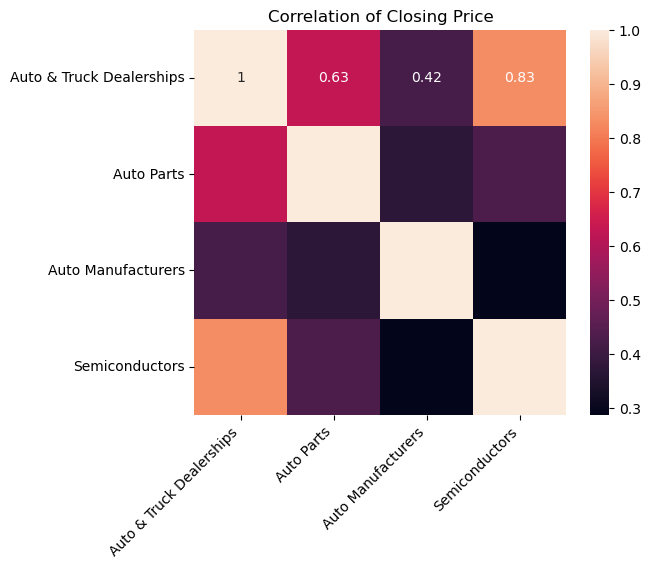

In [11]:
plt.figure(figsize=(6,5))
sbn.heatmap(correlation_matrix, annot = True)
plt.xticks(rotation = 45, ha='right')
plt.title('Correlation of Closing Price')

In [12]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(merged_df['Auto & Truck Dealerships'], merged_df['Semiconductors'])

In [13]:
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
line_eq

'y = 1.38x + 33.42'

In [14]:
regressed_values = (slope * merged_df['Auto & Truck Dealerships']) + intercept

The r-value is: 0.83


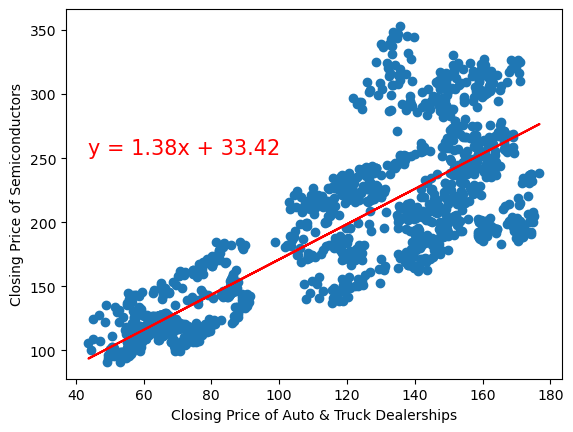

In [15]:
x_axis = merged_df['Auto & Truck Dealerships']
y_axis = merged_df['Semiconductors']
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regressed_values, color='r')
plt.annotate(line_eq, (min(x_axis), max(y_axis)-100), fontsize=15, color='red')
plt.xlabel("Closing Price of Auto & Truck Dealerships")
plt.ylabel("Closing Price of Semiconductors")
correlation_coefficient = f'The r-value is: {rvalue:.2f}'
print(correlation_coefficient)

In [16]:
series_merged_df = pd.concat([x_axis, y_axis], axis = 1)
series_merged_df.columns = ['Closing Price of Auto & Truck Dealerships', 'Closing Price of Semiconductors']
series_merged_df

,Closing Price of Auto & Truck Dealerships,Closing Price of Semiconductors
0,64.740,113.042
1,65.802,116.184
2,66.374,116.330
3,67.748,117.220
4,68.818,118.746
...,...,...
1486,133.242,337.756
1487,132.850,337.980
1488,133.144,331.320
1489,137.902,332.266


C:\Users\kunal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kunal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kunal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kunal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

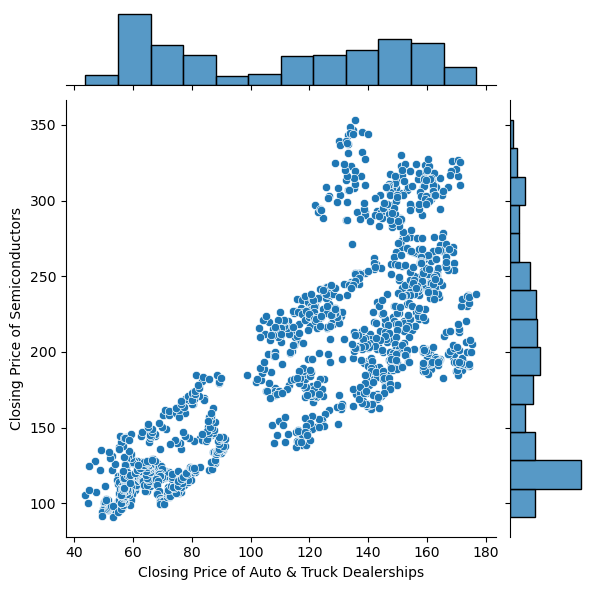

In [17]:
sbn.jointplot(x=series_merged_df['Closing Price of Auto & Truck Dealerships'], y=series_merged_df['Closing Price of Semiconductors'], kind='scatter')